This script generates the plots to compare SCITE-RNA, DENDRO and SClineager on simulated datasets with a variable number of ground truth clones. Additionally, it plots a comparison of the runtimes.

In [3]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os
import json

from src_python.cell_tree import CellTree
from src_python.utils import create_mutation_matrix, create_genotype_matrix

In [4]:
path = "../data/simulated_data"

n_cells = [100, 100, 50]
n_mut = [50, 100, 100]
n_tests = 100
clones = ["5", "10", "20", ""]
stratified = ""  # "_stratified" # stratified means all clones are about equally large

use_summary_statistics = False #True # Uses the summary files saved in the data/ directory. If raw output files were generated, set to False

In [7]:
genotype_differences = {"SCITE-RNA": {}}
n_round = 2

if not use_summary_statistics:
    for n_c, n_m in zip(n_cells, n_mut):
        genotype_differences["SCITE-RNA"][f"{n_c}_{n_m}"] = {}
        for clone in clones:
            differences = []
            for t in range(n_tests):
                base_path = os.path.join(path, f"{n_c}c{n_m}m{clone}{stratified}")
                genotype_pred_path = os.path.join(base_path, "sciterna", "sciterna_genotype", f"sciterna_genotype_{n_round}r{t}.txt")
                genotype_path = os.path.join(base_path, "genotype", f"genotype_{t}.txt")
                ref_path = os.path.join(base_path, "ref", f"ref_{t}.txt")
                alt_path = os.path.join(base_path, "alt", f"alt_{t}.txt")
                
                genotype_pred = np.loadtxt(genotype_pred_path, dtype=str)
                gt = np.loadtxt(genotype_path, dtype=str)
                alt = np.loadtxt(alt_path)
                ref = np.loadtxt(ref_path)
                
                mapping_dict = {'A': 1.0, 'H': 0.5, 'R': 0}
                vectorized_map = np.vectorize(lambda x: float(mapping_dict[x]))
                genotype_predicted = vectorized_map(genotype_pred)
                genotype = vectorized_map(gt)
                            
                # difference = np.sum(genotype_predicted != genotype)
                difference = np.sum(np.abs(genotype_predicted - genotype))
                differences.append(difference/(n_c * n_m))
    
            genotype_differences["SCITE-RNA"][f"{n_c}_{n_m}"][clone] = differences        
            print(np.mean(differences), " mean abs difference of vafs predicted")

0.036044  mean abs difference of vafs predicted
0.042024000000000006  mean abs difference of vafs predicted
0.042108999999999994  mean abs difference of vafs predicted
0.038599999999999995  mean abs difference of vafs predicted
0.02799500000000001  mean abs difference of vafs predicted
0.029460999999999994  mean abs difference of vafs predicted
0.0318475  mean abs difference of vafs predicted
0.0330265  mean abs difference of vafs predicted
0.043147000000000005  mean abs difference of vafs predicted
0.04256499999999999  mean abs difference of vafs predicted
0.046714000000000006  mean abs difference of vafs predicted
0.047027  mean abs difference of vafs predicted


In [8]:
genotype_differences["SClineager"] = {}

if use_summary_statistics == False:
    for n_c, n_m in zip(n_cells, n_mut):
        genotype_differences["SClineager"][f"{n_c}_{n_m}"] = {}
        for clone in clones:
            differences = []
            for t in range(n_tests):
                base_path = os.path.join(path, f"{n_c}c{n_m}m{clone}{stratified}")
                vaf_pred_path = os.path.join(base_path, "sclineager_vaf", f"sclineager_vaf_{t}.txt")
                genotype_path = os.path.join(base_path, "genotype", f"genotype_{t}.txt")
                ref_path = os.path.join(base_path, "ref", f"ref_{t}.txt")
                alt_path = os.path.join(base_path, "alt", f"alt_{t}.txt")
        
                vaf_pred = np.loadtxt(vaf_pred_path, dtype=float).T
                gt = np.loadtxt(genotype_path, dtype=str)
                alt = np.loadtxt(alt_path)
                ref = np.loadtxt(ref_path)
                
                mapping_dict = {'A': 1.0, 'H': 0.5, 'R': 0}
                vectorized_map = np.vectorize(lambda x: float(mapping_dict[x]))
                genotype = vectorized_map(gt)
                
                vaf_pred = np.round(vaf_pred * 2) / 2
                difference = np.sum(np.abs(vaf_pred - genotype))
                differences.append(difference/(n_c * n_m))
    
                    
            genotype_differences["SClineager"][f"{n_c}_{n_m}"][clone] = differences        
            print(np.mean(differences), " mean abs difference of vafs predicted")

0.062866  mean abs difference of vafs predicted
0.082898  mean abs difference of vafs predicted
0.072111  mean abs difference of vafs predicted
0.058392  mean abs difference of vafs predicted
0.05847499999999997  mean abs difference of vafs predicted
0.0643465  mean abs difference of vafs predicted
0.0627055  mean abs difference of vafs predicted
0.058754999999999995  mean abs difference of vafs predicted
0.087587  mean abs difference of vafs predicted
0.08110999999999999  mean abs difference of vafs predicted
0.08910600000000002  mean abs difference of vafs predicted
0.071895  mean abs difference of vafs predicted


In [9]:
genotype_differences["DENDRO"] = {}

if use_summary_statistics == False:
    for n_c, n_m in zip(n_cells, n_mut):
        genotype_differences["DENDRO"][f"{n_c}_{n_m}"] = {}
        for clone in clones:
            differences = []
            for t in range(n_tests):
                base_path = os.path.join(path, f"{n_c}c{n_m}m{clone}{stratified}")
                clones_pred_path = os.path.join(base_path, "dendro_clones", f"dendro_clones_{t}.txt")
                clones_pred = np.loadtxt(clones_pred_path, dtype=float)
                genotype_path = os.path.join(base_path, "genotype", f"genotype_{t}.txt")
                ref_path = os.path.join(base_path, "ref", f"ref_{t}.txt")
                alt_path = os.path.join(base_path, "alt", f"alt_{t}.txt")
        
                gt = np.loadtxt(genotype_path, dtype=str).T
                alt = np.loadtxt(alt_path).T
                ref = np.loadtxt(ref_path).T
                with np.errstate(invalid='ignore'):
                    vaf_observed = alt/(alt+ref)
                
                mapping_dict = {'A': 1.0, 'H': 0.5, 'R': 0}
                vectorized_map = np.vectorize(lambda x: float(mapping_dict[x]))
                genotype = vectorized_map(gt)
                
                unique_classes = np.unique(clones_pred)
        
                # For each unique class, replace column values with the mean of the columns of that class
                for cls in unique_classes:
                    class_indices = np.where(clones_pred == cls)[0]
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore", category=RuntimeWarning)
                        mean_values = np.nanmean(vaf_observed[:, class_indices], axis=1)
                    
                    # in case the mean is nan replace it with the mean genotype over all cells
                    row_nanmean = np.nanmean(vaf_observed, axis=1)
                    if np.isnan(row_nanmean).any():
                        raise ValueError("Error: The array contains NaN values.")
                    mean_values = np.where(np.isnan(mean_values), row_nanmean, mean_values)
                    if np.isnan(mean_values).any():
                        raise ValueError("Error: The array contains NaN values.")
                    
                    vaf_observed[:, class_indices] = np.tile(mean_values[:, np.newaxis], len(class_indices))
                        
                    
                vaf_observed_rounded = np.round(vaf_observed * 2) / 2
                if np.isnan(vaf_observed_rounded).any():
                    print("Error: The array contains NaN values.")
                
                difference = np.nansum(np.abs(vaf_observed_rounded - genotype))
                differences.append(difference/(n_c * n_m))
                    
            genotype_differences["DENDRO"][f"{n_c}_{n_m}"][clone] = differences           
            print(np.mean(differences), " mean abs difference of vafs predicted")

Error: The array contains NaN values.
Error: The array contains NaN values.
0.057424  mean abs difference of vafs predicted
Error: The array contains NaN values.
0.09304899999999998  mean abs difference of vafs predicted
Error: The array contains NaN values.
Error: The array contains NaN values.
0.095348  mean abs difference of vafs predicted
Error: The array contains NaN values.
Error: The array contains NaN values.
0.06949399999999999  mean abs difference of vafs predicted
Error: The array contains NaN values.
0.048075  mean abs difference of vafs predicted
0.0733845  mean abs difference of vafs predicted
Error: The array contains NaN values.
0.08462250000000003  mean abs difference of vafs predicted
Error: The array contains NaN values.
Error: The array contains NaN values.
0.0648575  mean abs difference of vafs predicted
0.09438200000000001  mean abs difference of vafs predicted
0.10844999999999999  mean abs difference of vafs predicted
0.10986999999999998  mean abs difference of v

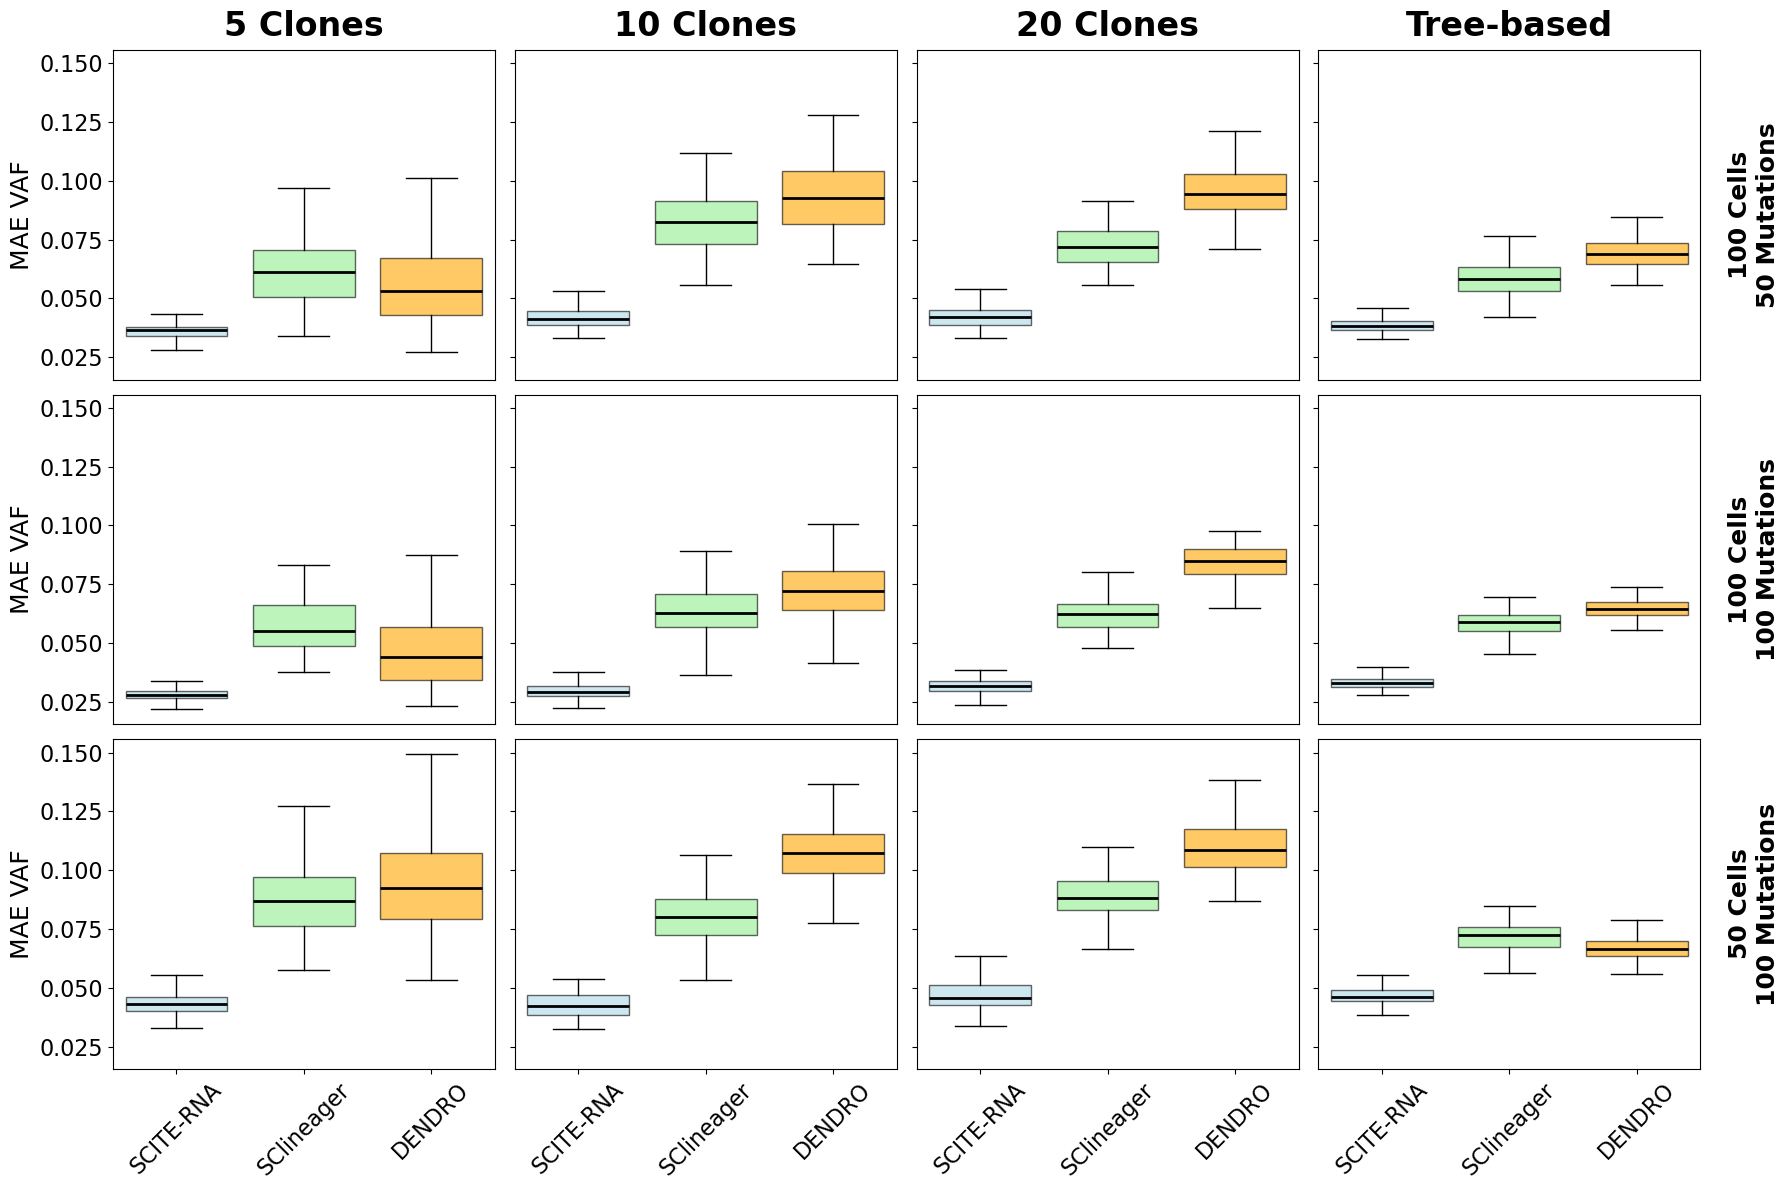

In [10]:
if use_summary_statistics:
    with open(r"../data/simulated_data/model_comparison.json") as f:
        genotype_differences = json.load(f)

models = ["SCITE-RNA", "SClineager", "DENDRO"]

fig, axes = plt.subplots(3, 4, figsize=(18, 12), sharey=True)

colors = ["lightblue", "lightgreen", "orange"]
alpha_value = 0.6

title_size = 24
label_size = 18
tick_size = 16
box_width = 2.0
boxplot_widths = 0.8

for row_idx, (n_c, n_m) in enumerate(zip(n_cells, n_mut)):
    for col_idx, clone in enumerate(clones):
        all_samples = []
        for model in models:
            all_samples.append(genotype_differences[model][f"{n_c}_{n_m}"][clone])
        
        ax = axes[row_idx, col_idx]
        box = ax.boxplot(all_samples, patch_artist=True, widths=boxplot_widths, showfliers=False)
        
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(alpha_value)
        
        for line in box['medians']:
            line.set_linewidth(box_width)
            line.set_color("black")
        
        if row_idx == 0:
            if clone == "":
                ax.set_title("Tree-based", fontsize=title_size, pad=10, fontweight="bold")
            else:
                ax.set_title(f"{clone} Clones", fontsize=title_size, pad=10, fontweight="bold")

        if row_idx == 2:
            ax.set_xticklabels(models, fontsize=tick_size)
        else:
            ax.set_xticks([])  # Remove x-ticks for the higher rows

        if col_idx == 0:
            ax.set_ylabel('MAE VAF', fontsize=label_size)
        if col_idx == 3:
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(f'{n_c} Cells\n{n_m} Mutations', fontsize=label_size, rotation=90, labelpad=20, fontproperties=FontProperties(weight='bold'))

        ax.tick_params(axis='x', labelsize=tick_size, rotation=45)
        ax.tick_params(axis='y', labelsize=tick_size)
        ax.grid(False)

plt.tight_layout()
plt.savefig("../data/results/figures/clones.png")
plt.show()

In [8]:
base_path = os.path.join(path, f"{100}c{100}m{10}{stratified}")

runtime_sclineager = np.loadtxt(os.path.join(base_path, "execution_times_sclineager.txt"))
runtime_dendro = np.loadtxt(os.path.join(base_path, "execution_times_dendro.txt"))
runtime_sciterna = np.loadtxt(os.path.join(base_path, "execution_times_sciterna.txt"))

data = [runtime_sciterna, runtime_sclineager, runtime_dendro]

plt.figure(figsize=(8, 5))
box = plt.boxplot(data, patch_artist=True, widths=boxplot_widths, showfliers=False)

colors = ["lightblue", "lightgreen", "orange"]
alpha_value = 0.6
box_width = 2.0

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(alpha_value)

for line in box['medians']:
    line.set_linewidth(box_width)
    line.set_color("black")

plt.title("Runtime Comparison (100 Cells, 100 Mutations)", fontsize=24, pad=20)
plt.ylabel('Runtime in seconds (log-scale)', fontsize=18)
plt.yscale('log')
plt.xticks(ticks=[1, 2, 3], labels=models, fontsize=18)  
plt.tick_params(axis='y', labelsize=16)
plt.grid(False)

plt.tight_layout()
# plt.savefig("../data/results/figures/runtimes.png")
plt.show()

FileNotFoundError: ../data/simulated_data\100c100m10\execution_times_sclineager.txt not found.

In [ ]:
base_path = os.path.join(path, f"{100}c{100}m{5}{stratified}")
base_path2 = os.path.join(r"../data/simulated_data - Kopie (3)", f"{100}c{100}m{5}{stratified}")

In [ ]:
# Function to compare two text files loaded as numpy arrays
def compare_files(file1, file2):
    """Compares the contents of two text files (loaded as numpy arrays)."""
    try:
        # Load the files with np.genfromtxt (handles mixed types)
        data1 = np.genfromtxt(file1, dtype=None, encoding=None)
        data2 = np.genfromtxt(file2, dtype=None, encoding=None)
        
        # Check if the data arrays are identical
        return np.array_equal(data1, data2)
    except Exception as e:
        print(f"Error comparing files {file1} and {file2}: {e}")
        return False

# Iterate through subfolders in base_path
for subfolder in os.listdir(base_path):
    subfolder_path = os.path.join(base_path, subfolder)
    subfolder_path2 = os.path.join(base_path2, subfolder)
    
    # Check if both subfolders exist in both locations
    if os.path.isdir(subfolder_path) and os.path.isdir(subfolder_path2):
        # Iterate through .txt files in the subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".txt"):
                file1 = os.path.join(subfolder_path, filename)
                file2 = os.path.join(subfolder_path2, filename)

                # Check if the files exist in both subfolders
                if os.path.isfile(file1) and os.path.isfile(file2):
                    # Compare the files
                    if compare_files(file1, file2):
                        continue
                        # print(f"Files {file1} and {file2} are identical.")
                    else:
                        print(f"Files {file1} and {file2} are different.")
                else:
                    print(f"File missing in one of the subfolders: {file1}, {file2}")
    else:
        print(f"Subfolder {subfolder} not found in both directories: {subfolder_path}, {subfolder_path2}")